In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor
    sine(cosine) wave를 만들어주는 함수.
    sr : 1초에 몇 개인지 (이 개념은 Hz로 모두 측정) 
    freq : sine곡선에서 태극 문양이 몇 회 반복되는지 -> pitch
    sine wave의 합 => sound
    amp : 진폭 -> 세기, 강도
    amp, sampling rate, duration, frq 정의를 통해 sine wave 만들기

In [3]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = .5        # in seconds
freq = 200    # sine frequency, Hz

    t = np.arrange(1, sr+1) : 1부터 1000까지의 숫자를 만듬
    t = np.arrange(1, sr+1)/sr : 1초까지의 time sample을 만든 작업.(일만개의 샘플)
    t = np.arrange(1, sr*0.5+1) : 실제로는 반땡임(?)

In [4]:
# generate time
t = np.arange(1, sr * dur+1)/sr
len(t)

5000

    theta = t*2*pi : radian(각도)값을 받는 sine을 시간화해주기 위한 작업

In [5]:
# generate phase
theta = t * 2*np.pi * freq

In [7]:
# generate signal by cosine-phasor
s = np.sin(theta)
len(s)

5000

    ax.plot에는 3개의 argument, 각각 (x축, y축, 점표시)를 의미.
    ax.plot(t, s) : plotting에는 theta가 아닌 t로 사용됨
   점은 총 일만개 = len(s)

<IPython.core.display.Javascript object>


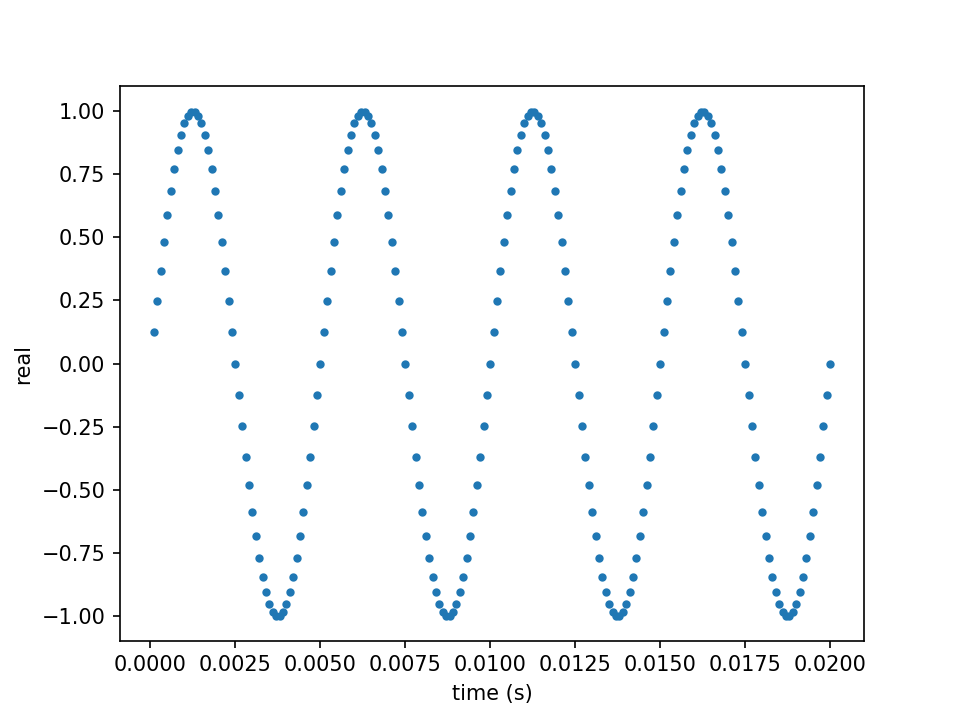

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:200], s[0:200], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

sin대신 exp함수도 가능(복소수의 영역으로 3D화가 가능)

<IPython.core.display.Javascript object>


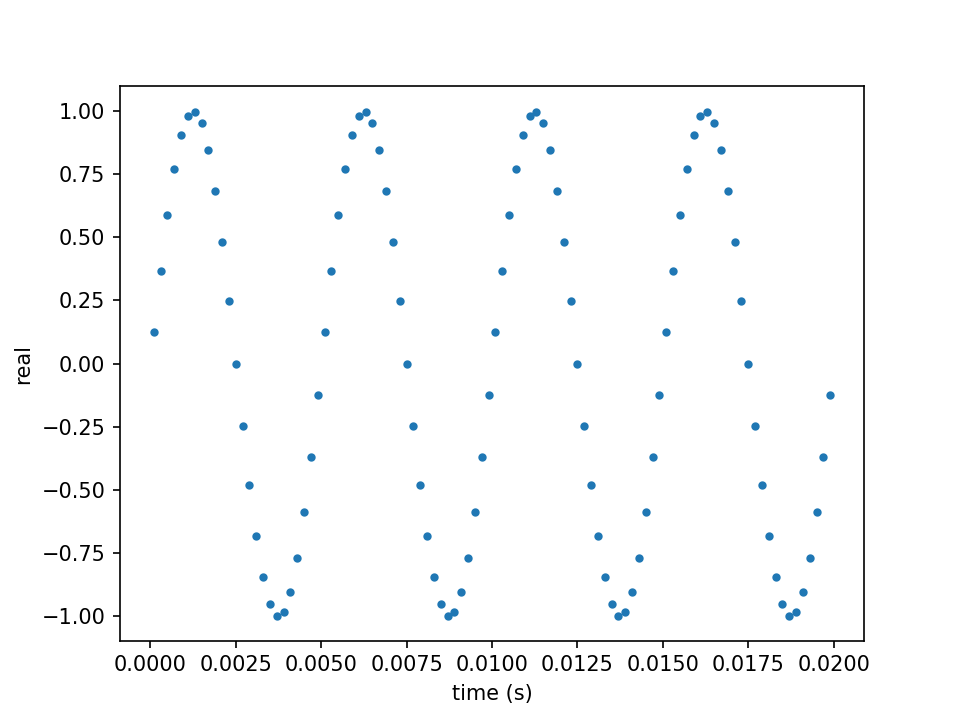

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:200:2], s[0:200:2], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ipd.Audio(s, rate=sr)

In [10]:
# generate signal by complex-phasor
c =amp*np.exp(theta*1j)

    exp을 이용한
    ax.plot(ㅁ, ㅁ, ㅁ) : ㅁ칸에는 각각 time, complex num 중 실수 , 허수 부분을 의미 -> x, y, z축으로 3D화

<IPython.core.display.Javascript object>


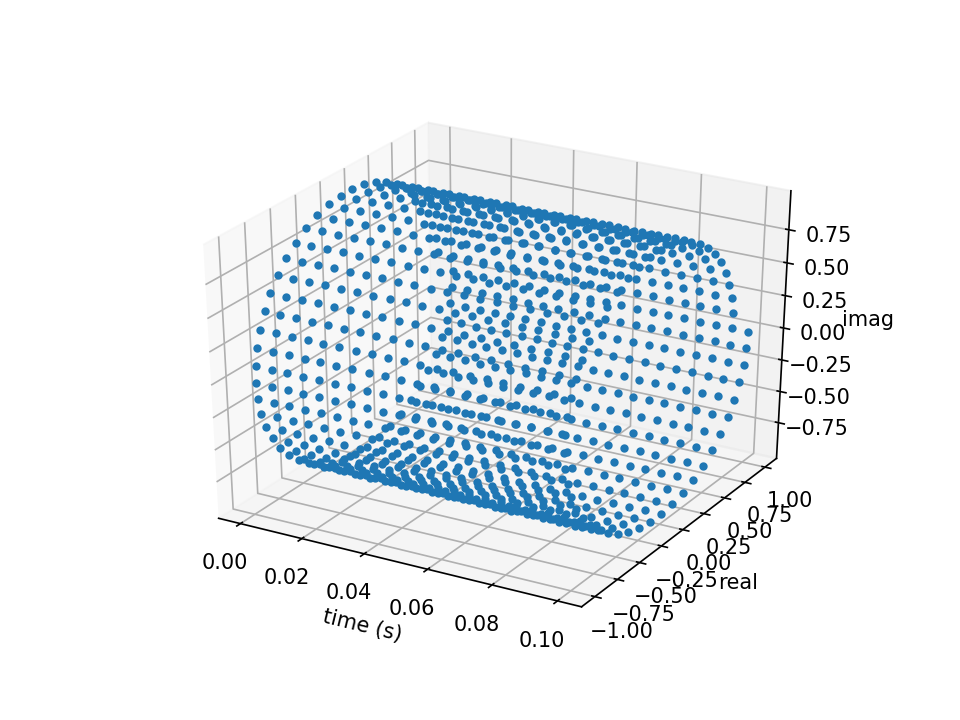

Text(0.5, 0, 'imag')

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

    2차원으로 단면화해서 살펴보면
    (time, imag) -> sine함수
    (time, real) -> cosine함수

In [12]:
ipd.Audio(s, rate=sr)

# Generate pulse train

    F = freq
    for루프 돌 때마다 만들어지는 signal = tmp
    100, 200, 300, 400 ... 5000가 계속해서 더해짐
    축척되어서 소리를 만들어내는 작업    

<IPython.core.display.Javascript object>


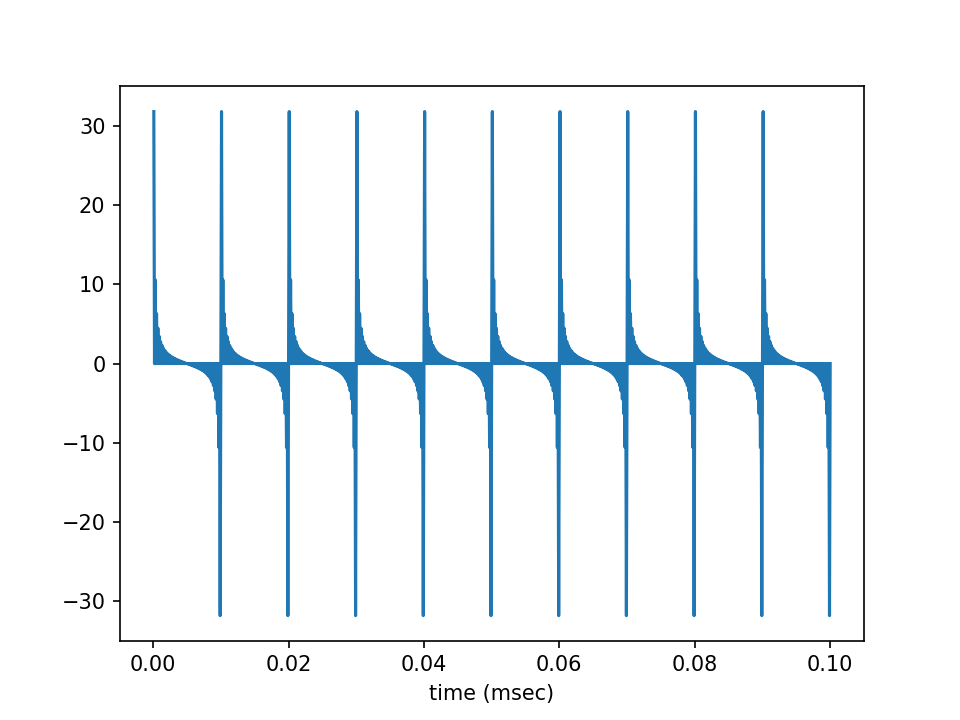

In [17]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)